In [77]:
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install pandas
!pip3 install numpy
!pip3 install kneed


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем набор данных
data = pd.read_csv('s1.txt', header=None, sep='    ')
data

C:\Users\andre\AppData\Local\Temp\ipykernel_6192\3960805795.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('s1.txt', header=None, sep='    ')


,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


C:\Users\andre\OneDrive\env\PyCharmProjects\laba3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


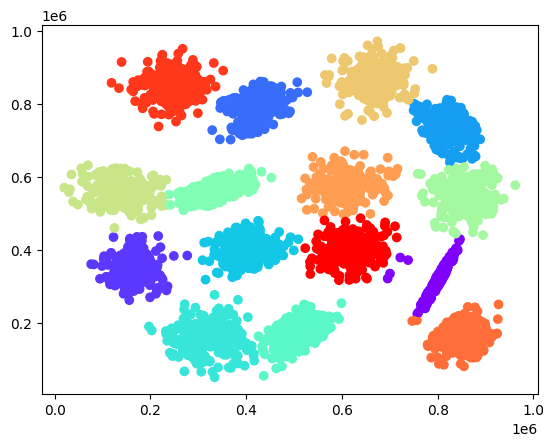

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15).fit(data)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')

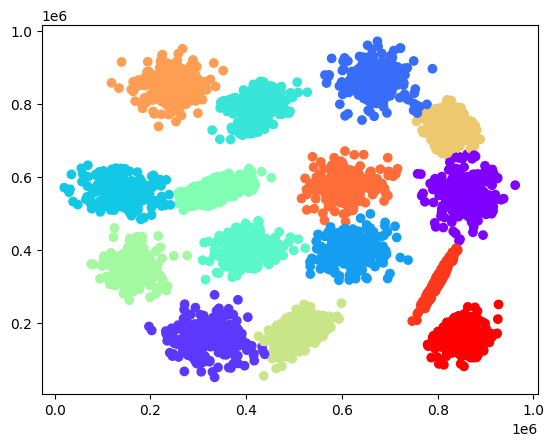

In [45]:
from sklearn.cluster import AgglomerativeClustering  # Иерархическая кластеризация

agglomerative = AgglomerativeClustering(n_clusters=15).fit(data)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=agglomerative.labels_, cmap='rainbow')

C:\Users\andre\OneDrive\env\PyCharmProjects\laba3\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


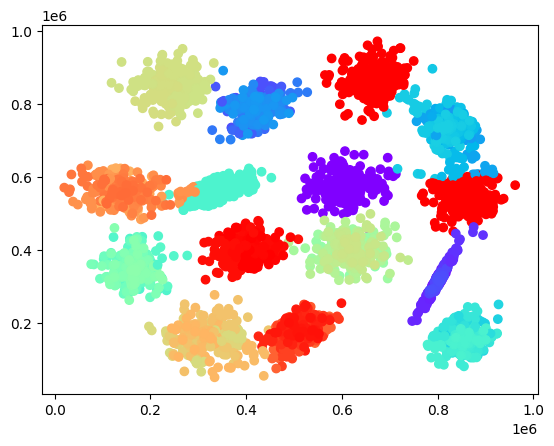

In [47]:
from sklearn.cluster import AffinityPropagation  # Кластеризация распространения близости

affinity = AffinityPropagation().fit(data)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=affinity.labels_, cmap='rainbow')

42410.774728249184


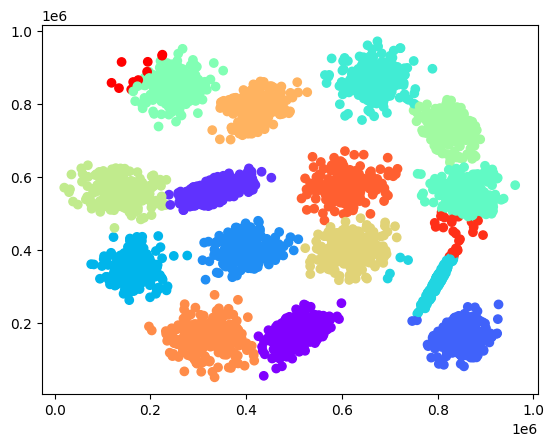

In [112]:
from sklearn.cluster import MeanShift, estimate_bandwidth  # Кластеризация среднего сдвига
print(estimate_bandwidth(data, quantile=0.03))

meanshift = MeanShift(bandwidth=51043.01489920046).fit(data)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=meanshift.labels_, cmap='rainbow')

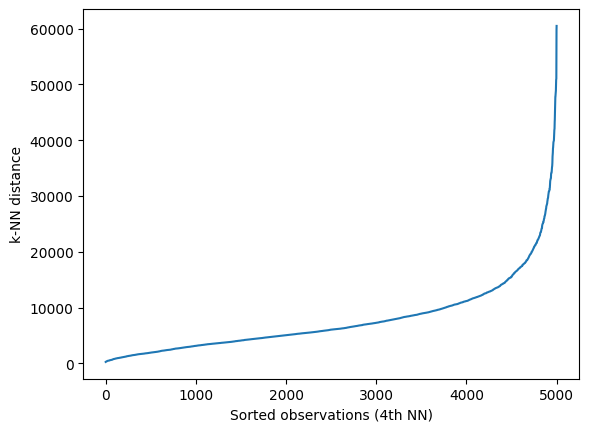

In [75]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(data)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [81]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

51043.01489920046


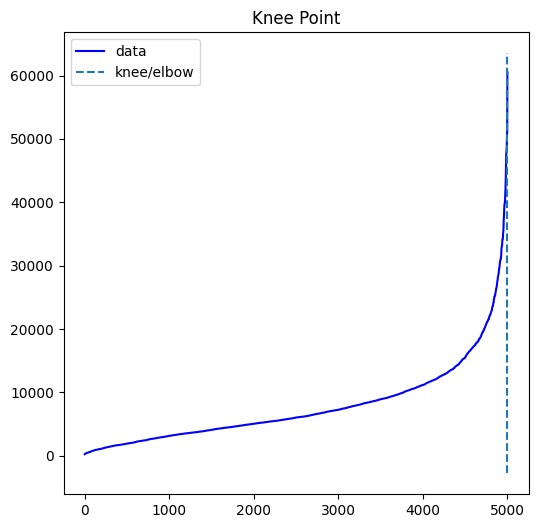

In [96]:
kneedle.plot_knee()
plt.show()

(5000, 2)


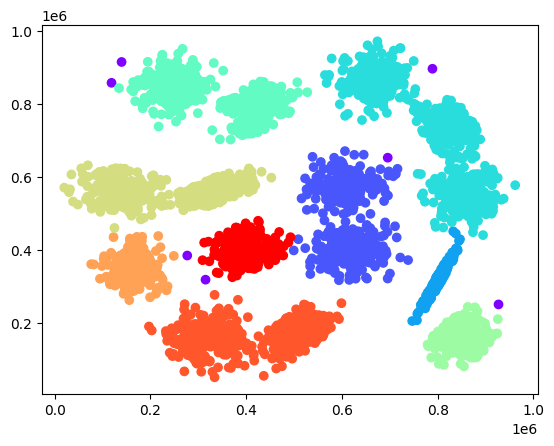

In [95]:
from sklearn.cluster import DBSCAN
import numpy as np

# среднее расстояние каждой точки данных до ее k-ближайших соседей ищем для получения epsilon
# min_samples = 2 * number of dimensions // = 2 * 15 (clusters)
cluster = DBSCAN(eps = 51043.01, min_samples = 30).fit(data)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster.labels_, cmap='rainbow')